<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg"  width=300, align="right">
<br>
<br>
<br>
<br>
<br>

# ***COVID-19: Traçando os Primeiros Casos e Respostas Globais***
---

In [ ]:
#@title Identificação do Grupo

#@markdown Integrantes do Grupo (*informe \<TIA\>,\<nome\>*)
Aluno1 = 'Gustavo Silva Rios' #@param {type:"string"}
Aluno2 = 'Silas de Souza Ferreira' #@param {type:"string"}
Aluno3 = 'Israel Soares do N. Viana ' #@param {type:"string"}



# **Apresentação**

# Problema

Este trabalho examina os dados iniciais da pandemia de COVID-19, concentrando-se na situação global em 31 de dezembro de 2019. Naquela data, a maioria dos países ainda não havia registrado casos confirmados, exceto a China, que relatou 27 casos. Países como Afeganistão, Brasil, Canadá, Alemanha, Austrália e muitos outros não tinham casos reportados na época.

A escolha desse tema é justificada pela necessidade de entender como a pandemia começou e como os diferentes países responderam inicialmente. Compreender esses primeiros momentos é crucial para avaliar a eficácia das medidas de contenção adotadas posteriormente e para melhorar a preparação para futuras pandemias.

A relevância do problema reside no impacto global sem precedentes da COVID-19. Analisar os dados iniciais e as respostas dos países oferece insights valiosos sobre a propagação do vírus e a capacidade dos sistemas de saúde de lidar com emergências sanitárias. Este trabalho contribui para o conhecimento sobre a importância da vigilância precoce, da rápida implementação de medidas de saúde pública e da cooperação internacional em situações de crise.*



# Referencial Teórico

Utilizamos dois tipos de modelos, o primeiro modelo baseado em regressão linear, com a finalidade de fazer uma previsão da quantidade de mortes, e comparar com a quantidade que houve de fato.
O segundo modelo baseado na modelagem K-means foi utilizado para compreender o impacto da COVID-19 em cada país, isto é, classificá-los em 3 categorias, que variam entre impacto baixo,  impacto moderado e impacto significativo, isso utilizando a comparação entre casos confirmados e quantidade de mortes, utilizando outro tipo de nomenclatura conforme o modelo classificou.

A utilização de tais modelos contribuem com as pesquisas que foram e estão sendo realizadas até hoje, tais como a avaliação do motivo de maior ou menor impacto em cada país, avaliar quais foram os países com a maior quantidade de mortes e avaliar o motivo disso, dentre vários outros estudos.

Os dados utilizados foram coletados pelo ECDC (European Centre of Disease Prevention and Control) que é um organismo da União Europeia que visa identificar possíveis ameaças para a saúde humana, a tecnologia utilizada para extração da base de dados é baseada em armazenamento em nuvem e foi extraída do  google cloud big query utilizando linguagem SQL. Para construir os modelos foi utilizado o método de aprendizagem supervisionada, utilizando linguagem Python com destaque para a biblioteca Sklearn, e as bibliotecas pandas, numpy e seaborn para demais análises realizadas.

# Metodologia

Para melhor funcionamento do modelo e esclarecimento do conteúdo da base de dados, foram efetuados alguns processamentos nos dados, tais quais:

- Verificação de dados nulos

- Verificação de dados infinitos e duplicados

- Estatísticas descritivas dos dados

- Verificação de outliers

- Análise exploratória, análise de séries temporais e análise geográfica



# Resultados


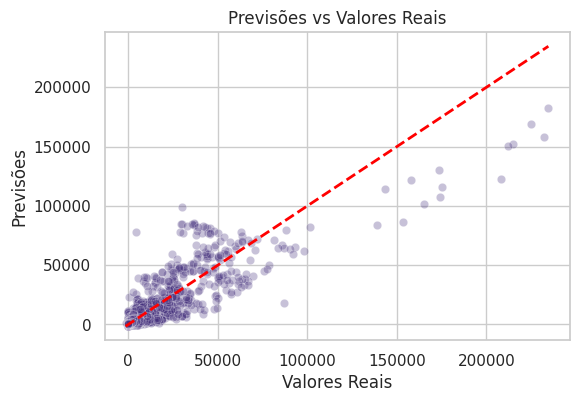

In [ ]:
plt.figure(figsize=(6, 4))
ax = sns.scatterplot(x=y_test, y=y_pred, alpha=0.3)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Linha y=x

# Definir os rótulos e título do gráfico
ax.set(xlabel='Valores Reais', ylabel='Previsões', title='Previsões vs Valores Reais')

# Mostrar o gráfico
plt.show()

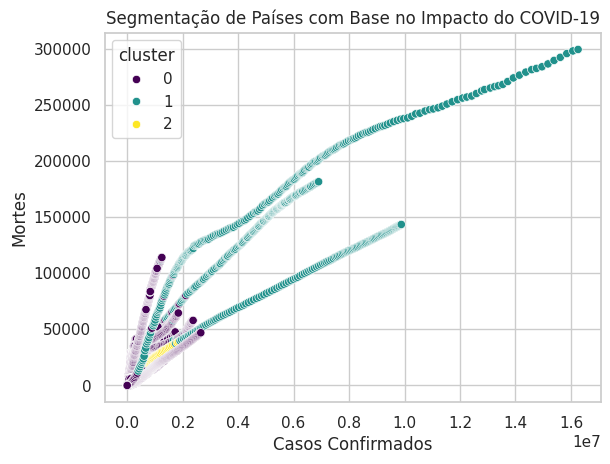

In [ ]:
# Visualização dos clusters (exemplo com duas variáveis para visualização, você pode escolher outras)
sns.scatterplot(x='confirmed_cases', y='deaths', hue='cluster', data=df, palette='viridis')
plt.title('Segmentação de Países com Base no Impacto do COVID-19')
plt.xlabel('Casos Confirmados')
plt.ylabel('Mortes')
plt.show()

# **Implementação**

# Base de Dados

*Descreva aqui os dados utilizados, discuta eventuais transformações e/ou seleções dos dados e preparações nos dados.*




# **Entendimento dos Dados**

In [ ]:
from google.cloud import bigquery
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "composite-keel-371920-24c2737df989.json"

# Configurando objetos Pandas DataFrame e Numpy Arrays para exibirem todas as informações
np.set_printoptions(threshold=np.inf)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Configurando estilo e paleta de cores que serão utilizadas nos gráficos
sns.set_theme(style="whitegrid", palette="viridis")
sns.color_palette('viridis')

[(0.275191, 0.194905, 0.496005),
 (0.212395, 0.359683, 0.55171),
 (0.153364, 0.497, 0.557724),
 (0.122312, 0.633153, 0.530398),
 (0.288921, 0.758394, 0.428426),
 (0.626579, 0.854645, 0.223353)]

In [ ]:
"""# Configurar o cliente BigQuery
client = bigquery.Client()

# Definir a consulta SQL
query = '''SELECT * FROM `bigquery-public-data.covid19_ecdc_eu.covid_19_geographic_distribution_worldwide`'''

# Executar a consulta e obter os resultados
query_job = client.query(query)
df_big_query = query_job.to_dataframe()

# Salvando em csv
df_big_query.to_csv('covid19_eu.csv')"""

"# Configurar o cliente BigQuery\nclient = bigquery.Client()\n\n# Definir a consulta SQL\nquery = '''SELECT * FROM `bigquery-public-data.covid19_ecdc_eu.covid_19_geographic_distribution_worldwide`'''\n\n# Executar a consulta e obter os resultados\nquery_job = client.query(query)\ndf_big_query = query_job.to_dataframe()\n\n# Salvando em csv\ndf_big_query.to_csv('covid19_eu.csv')"

In [ ]:
df = pd.read_csv('covid19_eu.csv')
df.head(2)

,Unnamed: 0,date,day,month,year,daily_confirmed_cases,daily_deaths,confirmed_cases,deaths,countries_and_territories,geo_id,country_territory_code,pop_data_2019
0,0,2019-12-31,31,12,2019,0,0,0,0,Cases_on_an_international_conveyance_Japan,JPG11668,NaN,NaN
1,1,2019-12-31,31,12,2019,0,0,0,0,Afghanistan,AF,AFG,38041757.0


In [ ]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
df.head(2)

,date,day,month,year,daily_confirmed_cases,daily_deaths,confirmed_cases,deaths,countries_and_territories,geo_id,country_territory_code,pop_data_2019
0,2019-12-31,31,12,2019,0,0,0,0,Cases_on_an_international_conveyance_Japan,JPG11668,NaN,NaN
1,2019-12-31,31,12,2019,0,0,0,0,Afghanistan,AF,AFG,38041757.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61900 entries, 0 to 61899
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date                       61900 non-null  object 
 1   day                        61900 non-null  int64  
 2   month                      61900 non-null  int64  
 3   year                       61900 non-null  int64  
 4   daily_confirmed_cases      61900 non-null  int64  
 5   daily_deaths               61900 non-null  int64  
 6   confirmed_cases            61900 non-null  int64  
 7   deaths                     61900 non-null  int64  
 8   countries_and_territories  61900 non-null  object 
 9   geo_id                     61625 non-null  object 
 10  country_territory_code     61777 non-null  object 
 11  pop_data_2019              61777 non-null  float64
dtypes: float64(1), int64(7), object(4)
memory usage: 5.7+ MB


# **Verificação de Dados Nulos**

date                           0
day                            0
month                          0
year                           0
daily_confirmed_cases          0
daily_deaths                   0
confirmed_cases                0
deaths                         0
countries_and_territories      0
geo_id                       275
country_territory_code       123
pop_data_2019                123
dtype: int64

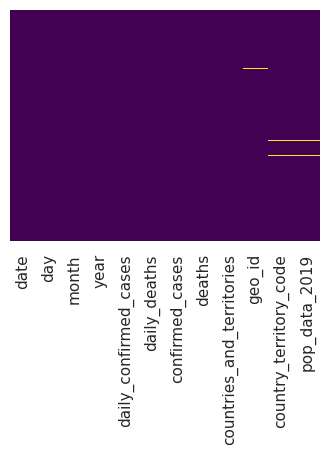

In [ ]:
plt.figure(figsize=(4,3))
sns.heatmap(df.isnull(),
            yticklabels=False,
            cbar=False,
            cmap='viridis')
df.isnull().sum()

# **Verificando Dados Infinitos**

In [ ]:
np.isinf(df.select_dtypes(include=['number'])).sum()

day                      0
month                    0
year                     0
daily_confirmed_cases    0
daily_deaths             0
confirmed_cases          0
deaths                   0
pop_data_2019            0
dtype: int64

# **Verificando Dados Duplicados**

In [ ]:
display(df.duplicated().sum())
df[df.duplicated()]

0

,date,day,month,year,daily_confirmed_cases,daily_deaths,confirmed_cases,deaths,countries_and_territories,geo_id,country_territory_code,pop_data_2019


# **Estatísticas Descritivas**

In [ ]:
df.describe()

,day,month,year,daily_confirmed_cases,daily_deaths,confirmed_cases,deaths,pop_data_2019
count,61900.000000,61900.000000,61900.000000,61900.000000,61900.000000,6.190000e+04,61900.000000,6.177700e+04
mean,15.628934,7.067157,2019.998918,1155.147237,26.055460,1.005831e+05,3101.676785,4.098770e+07
std,8.841582,2.954776,0.032882,6779.224479,131.227055,6.074374e+05,15538.122301,1.531294e+08
min,1.000000,1.000000,2019.000000,-8261.000000,-1918.000000,0.000000e+00,0.000000,8.150000e+02
25%,8.000000,5.000000,2020.000000,0.000000,0.000000,1.277500e+02,1.000000,1.293120e+06
50%,15.000000,7.000000,2020.000000,15.000000,0.000000,2.047000e+03,42.000000,7.169456e+06
75%,23.000000,10.000000,2020.000000,273.000000,4.000000,2.456775e+04,463.000000,2.851583e+07
max,31.000000,12.000000,2020.000000,234633.000000,4928.000000,1.625675e+07,299177.000000,1.433784e+09


# **Verificando Dados Discrepantes (Outliers)¶**
Primeira Verificação (Z-score): O Z-score é uma medida estatística que indica o quão longe um dado está da média em termos de desvios padrão. Valores de Z-score muito altos (geralmente acima de 2 ou 3 desvios padrão) podem indicar a presença de outliers.

Segunda Verificação (IQR): O IQR é a diferença entre o terceiro quartil (Q3) e o primeiro quartil (Q1). Os valores que estão muito abaixo de Q1 - 1,5 * IQR ou muito acima de Q3 + 1,5 * IQR são considerados outliers pelo método IQR.

Terceira Verificação (Boxplot): Serão feitos gráficos de boxplot em que os outliers serão representados como pontos fora dos limites de cada caixa;

In [ ]:
from scipy.stats import zscore

# Calcular o Z-score para todas as variáveis numéricas
df_zscore = df.select_dtypes(include=['number']).apply(zscore)

# Identificar outliers usando o Z-score (valores com Z-score > 3 ou < -3 são considerados outliers)
outliers_zscore = df_zscore[(df_zscore > 3) | (df_zscore < -3)].any(axis=1)
print(f'Número de outliers identificados pelo Z-score: {outliers_zscore.sum()}\n')

# Identificar outliers usando o Z-score (valores com Z-score > 3 ou < -3 são considerados outliers)
outliers_zscore = df_zscore[(df_zscore > 3) | (df_zscore < -3)]

# Visualizar os outliers por coluna
outliers_by_column = outliers_zscore.stack().reset_index()
outliers_by_column.columns = ['Index', 'Column', 'Z-score']
print("Outliers identificados por coluna:")

# Exibindo apenas 5 pois foram muitos resultados
print(outliers_by_column.head())

# Visualizar os outliers por instância
outliers_by_instance = outliers_zscore.any(axis=1)
outliers_indices = outliers_by_instance[outliers_by_instance].index
print("\nÍndices das instâncias com outliers:")
print(outliers_indices)

Número de outliers identificados pelo Z-score: 1386

Outliers identificados por coluna:
   Index Column   Z-score
0      0   year -30.37895
1      1   year -30.37895
2      2   year -30.37895
3      3   year -30.37895
4      4   year -30.37895

Índices das instâncias com outliers:
Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,     9,
       ...
       61119, 61120, 61121, 61122, 61123, 61124, 61125, 61126, 61127, 61128],
      dtype='int64', length=1386)


In [ ]:
# Filtrar o DataFrame original para incluir apenas colunas numéricas
df_numeric = df.select_dtypes(include=['number'])

# Calcular o IQR (Intervalo Interquartil) para cada variável numérica
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1

# Identificar outliers em cada coluna numérica usando o método IQR
outliers_indices = []
outliers_columns = []

for col in df_numeric.columns:
    lower_bound = Q1[col] - 1.5 * IQR[col]
    upper_bound = Q3[col] + 1.5 * IQR[col]
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    if not outliers.empty:
        outliers_indices.extend(outliers.index)
        outliers_columns.extend([col] * len(outliers))

# Criar um DataFrame com os índices das instâncias com outliers e as colunas correspondentes
outliers_df = pd.DataFrame({'Index': outliers_indices, 'Outlier_Column': outliers_columns})

# Mostrar o número de outliers identificados e a tabela com os índices das instâncias e colunas com outliers
print("Número de outliers identificados pelo método IQR:", len(outliers_df))
print("\nÍndices das instâncias com outliers e colunas correspondentes:")
print(outliers_df.sample(4))

Número de outliers identificados pelo método IQR: 48863

Índices das instâncias com outliers e colunas correspondentes:
       Index   Outlier_Column
29265  52804  confirmed_cases
16457  45813     daily_deaths
33385  18690           deaths
13408  23387     daily_deaths


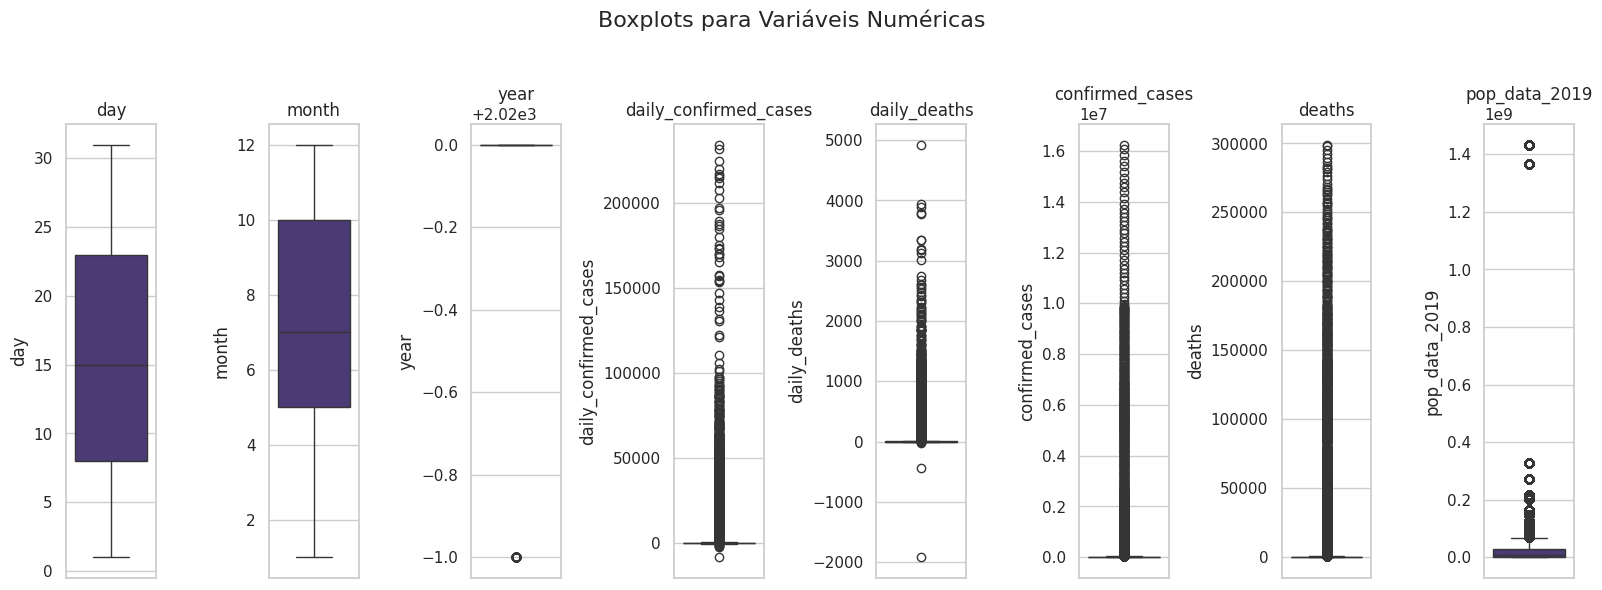

In [ ]:
# Filtrando apenas a lista das variáveis numéricas
numeric_columns = df.select_dtypes(include=['number']).columns

# Configuração dos subplots
fig, axes = plt.subplots(nrows=1, ncols=len(numeric_columns), figsize=(16, 6))
fig.suptitle('Boxplots para Variáveis Numéricas', fontsize=16)

# Criar boxplots para cada variável numérica
for i, col in enumerate(numeric_columns):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Ajusta a disposição para não sobrepor o título principal
plt.show()

# **Tratamento dos Dados**

In [ ]:
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)
# Converter a coluna 'date' para datetime
df['date'] = pd.to_datetime(df['date'])
df.drop(['day','month','year'], axis=1, inplace=True)

# **Análise Exploratória de Dados**

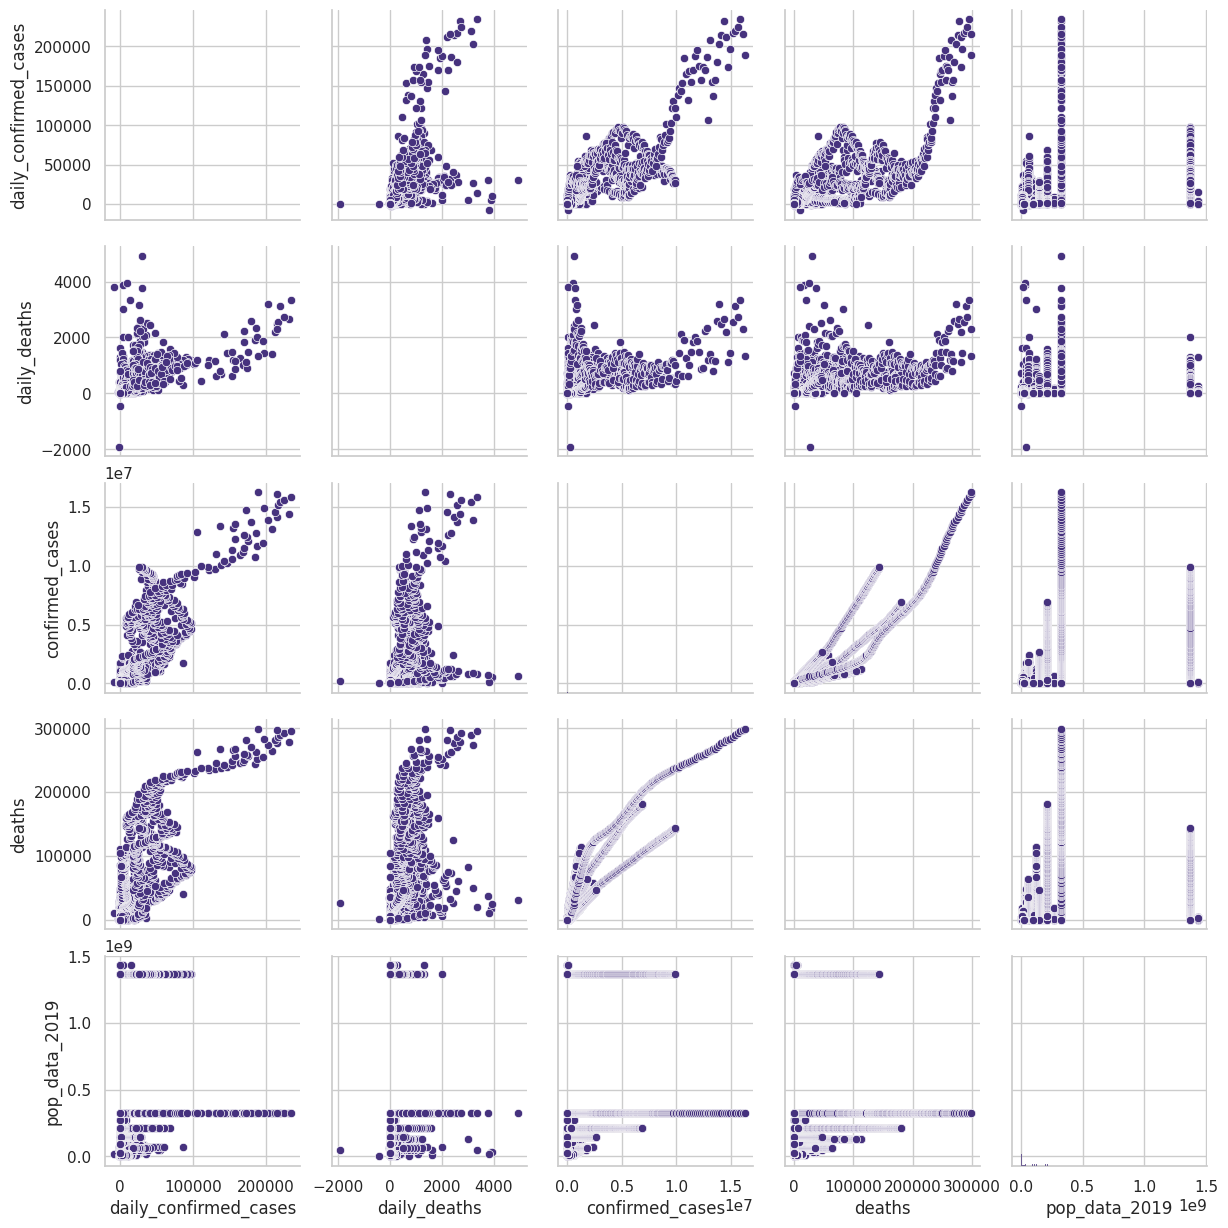

In [ ]:
sns.pairplot(df)

Maiores Correlações:
1: confirmed_cases - deaths: 0.9161963255524479
2: daily_confirmed_cases - confirmed_cases: 0.8622883700059341
3: daily_confirmed_cases - deaths: 0.799673333943107
4: daily_confirmed_cases - daily_deaths: 0.7434935112340745
5: daily_deaths - deaths: 0.6938542494590585
6: daily_deaths - confirmed_cases: 0.6337914740677244
7: pop_data_2019 - confirmed_cases: 0.3185200509895113
8: pop_data_2019 - daily_confirmed_cases: 0.3082574730516365
9: pop_data_2019 - daily_deaths: 0.27300230299424105
10: deaths - pop_data_2019: 0.2703450302127077

Menores Correlações:
1: deaths - pop_data_2019: 0.2703450302127077
2: pop_data_2019 - daily_deaths: 0.27300230299424105
3: pop_data_2019 - daily_confirmed_cases: 0.3082574730516365
4: pop_data_2019 - confirmed_cases: 0.3185200509895113
5: daily_deaths - confirmed_cases: 0.6337914740677244
6: daily_deaths - deaths: 0.6938542494590585
7: daily_confirmed_cases - daily_deaths: 0.7434935112340745
8: daily_confirmed_cases - deaths: 0.7996733

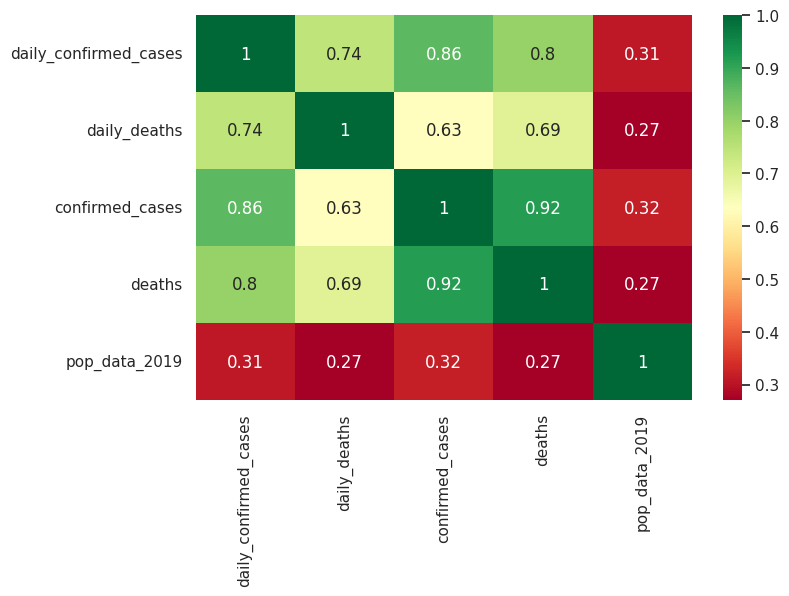

In [ ]:
def print_top_correlations(df):
    correlation_matrix = df.corr(numeric_only=True)

    plt.figure(figsize=(8,5))
    sns.heatmap(data=correlation_matrix,
                annot=True,
                cmap='RdYlGn')

    top_correlations = correlation_matrix.unstack().sort_values(ascending=False).drop_duplicates()

    # Pegue as 10 maiores correlações (ignorando a correlação com si mesmo, que sempre será 1.0)
    top_10_correlations = top_correlations[top_correlations.index.get_level_values(0) != top_correlations.index.get_level_values(1)].head(10)
    count = 0
    print('Maiores Correlações:')
    for index, value in top_10_correlations.items():
        count += 1
        print(f"{count}: {index[0]} - {index[1]}: {value}")

    # Pegue as 10 menores correlações (ignorando a correlação com si mesmo, que sempre será 1.0)
    top_10_correlations = top_correlations[top_correlations.index.get_level_values(0) != top_correlations.index.get_level_values(1)].tail(10)
    top_10_correlations.sort_values(ascending=True,inplace=True)
    count = 0
    print(f'\nMenores Correlações:')
    for index, value in top_10_correlations.items():
        count += 1
        print(f"{count}: {index[0]} - {index[1]}: {value}")

print_top_correlations(df)

# **Conclusões Heatmap**
confirmed_cases - deaths (0.916)

A correlação extremamente alta entre casos confirmados e mortes sugere que, conforme o número de casos confirmados aumenta, o número de mortes também tende a aumentar. Isso indica uma relação direta e forte, o que é esperado, pois mais casos confirmados de COVID-19 provavelmente levam a mais mortes.
daily_confirmed_cases - confirmed_cases (0.862)

Esta correlação alta mostra que o número de casos confirmados diariamente está fortemente relacionado com o total acumulado de casos confirmados. A soma dos casos diários contribui diretamente para o total de casos confirmados.
daily_confirmed_cases - deaths (0.800)

A forte correlação entre casos confirmados diários e mortes indica que um aumento no número de casos diários está associado a um aumento nas mortes. Isto pode sugerir que os surtos diários impactam diretamente o número de mortes.
daily_confirmed_cases - daily_deaths (0.743)

A correlação positiva entre casos confirmados diários e mortes diárias sugere que, nos dias com mais casos, também há um aumento no número de mortes. Este padrão pode ser observado especialmente durante picos de surtos.
daily_deaths - deaths (0.694)

A relação entre mortes diárias e mortes totais é esperada, pois as mortes diárias acumulam no total. Isto reforça a ideia de que monitorar as mortes diárias pode fornecer insights sobre as tendências das mortes totais.
daily_deaths - confirmed_cases (0.634)

A correlação moderada entre mortes diárias e casos confirmados indica que, embora exista uma relação, ela não é tão forte quanto outras métricas. Isso pode sugerir que nem todos os casos confirmados resultam em mortes imediatamente. Correlações Menores:
pop_data_2019 - confirmed_cases (0.319)

A correlação baixa entre a população e os casos confirmados sugere que, embora a população possa ter alguma influência no número de casos, não é um fator dominante. Isso pode indicar que a propagação da COVID-19 depende mais de outros fatores além da população total.
pop_data_2019 - daily_confirmed_cases (0.308)

Similar à correlação acima, a população total tem uma influência limitada no número diário de casos confirmados, sugerindo que outras variáveis (como densidade populacional, políticas de saúde pública) podem ser mais relevantes.
pop_data_2019 - daily_deaths (0.273)

A relação fraca entre população e mortes diárias reforça a ideia de que fatores específicos além do tamanho da população desempenham um papel mais significativo nas mortes diárias por COVID-19.
deaths - pop_data_2019 (0.270)

A baixa correlação entre mortes totais e população total sugere que, enquanto países mais populosos podem ter mais mortes totais, a relação não é forte. Isso pode refletir diferenças nas respostas à pandemia e nas infraestruturas de saúde.
As correlações mais altas indicam relações esperadas e importantes entre os dados da COVID-19, como o impacto direto dos casos confirmados nas mortes, tanto em termos diários quanto acumulados. As correlações mais baixas entre a população total e as métricas de COVID-19 sugerem que, embora a população seja um fator, não é o determinante principal na propagação e no impacto da COVID-19. Outros fatores, possivelmente relacionados a políticas de saúde pública, comportamento social e capacidades de resposta médica, podem ter papéis mais significativos.

# **Análise de Séries Temporais**

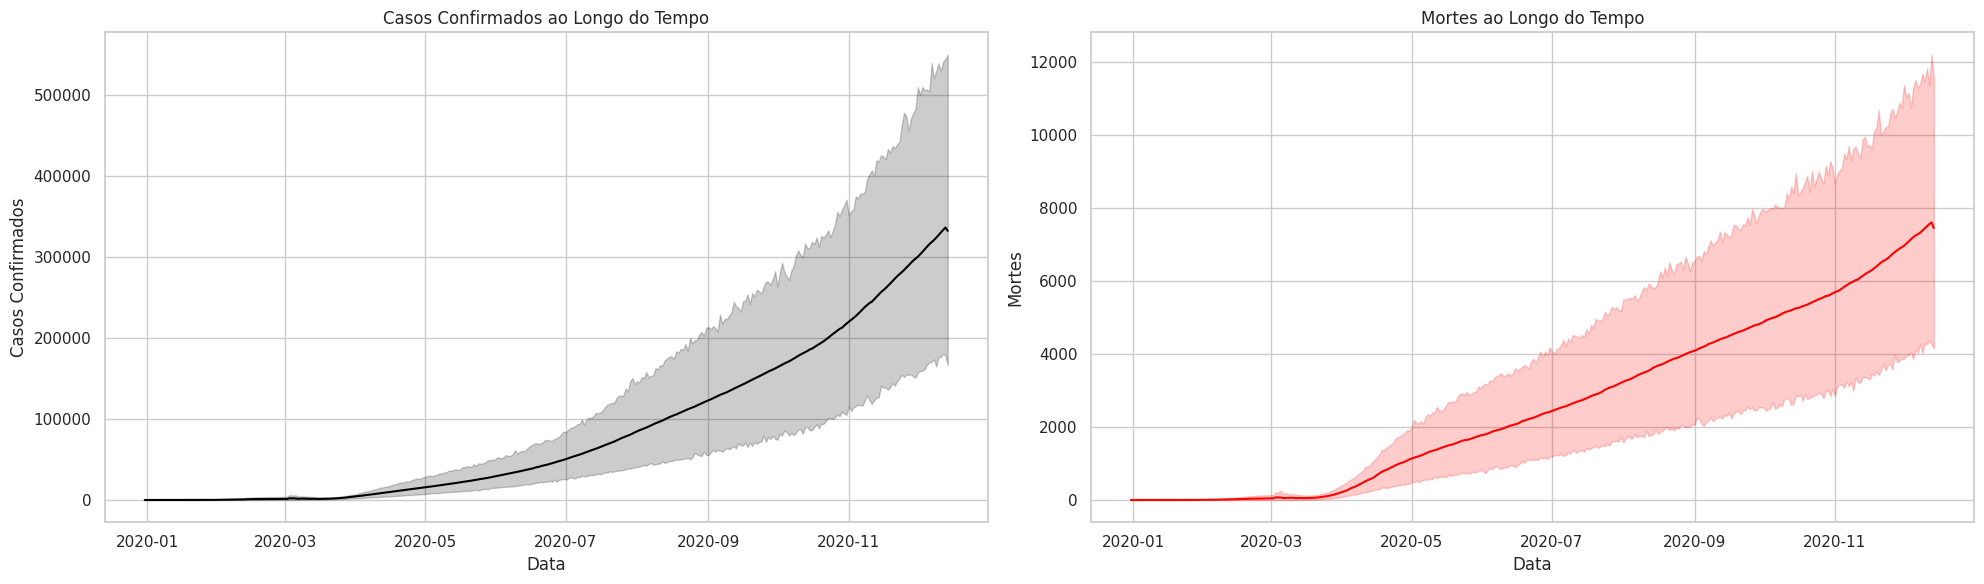

In [ ]:
# Converter a coluna 'date' para datetime
df['date'] = pd.to_datetime(df['date'])

# Configuração dos subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6), sharex=True)

# Gráfico de Casos Confirmados
sns.lineplot(ax=axes[0], x='date', y='confirmed_cases', data=df, color='black')
axes[0].set_title('Casos Confirmados ao Longo do Tempo')
axes[0].set_xlabel('Data')
axes[0].set_ylabel('Casos Confirmados')

# Gráfico de Mortes
sns.lineplot(ax=axes[1], x='date', y='deaths', data=df, color='red')
axes[1].set_title('Mortes ao Longo do Tempo')
axes[1].set_xlabel('Data')
axes[1].set_ylabel('Mortes')

# Ajustar layout
plt.tight_layout()
plt.show()

# **Análises Geográficas**
Utilizaremos a variável countries_and_territories que nos traz a localidade para análises nos locais de maior incidência de mortes e casos confirmados.


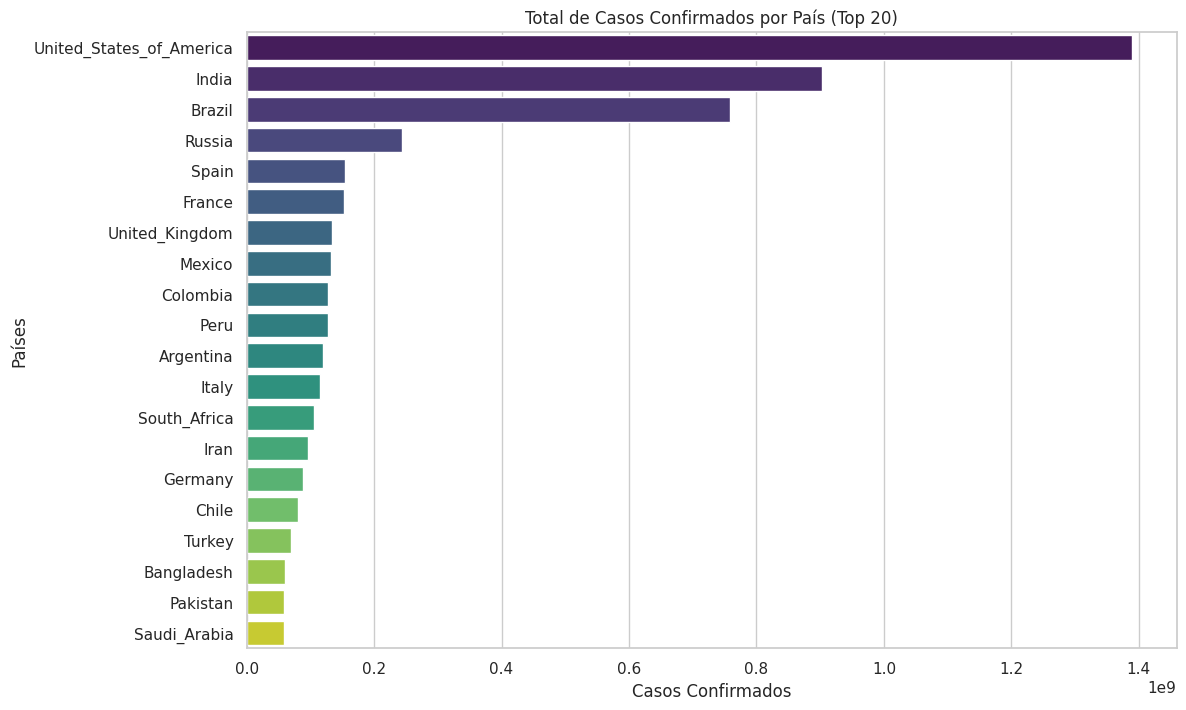

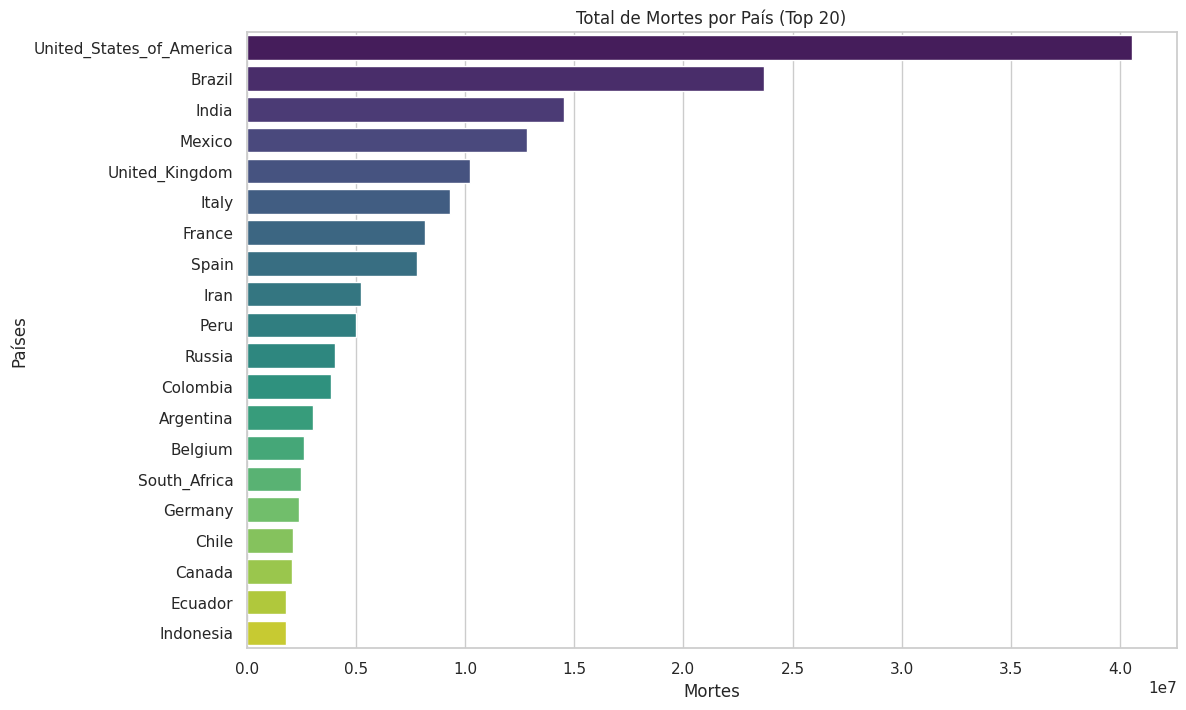

In [ ]:
# Agregar dados por país
df_country = df.drop('date', axis=1).groupby('countries_and_territories').sum().reset_index()

# Plotando a média de casos confirmados por país
plt.figure(figsize=(12, 8))
top_confirmed_cases = df_country.sort_values('confirmed_cases', ascending=False).head(20)
sns.barplot(x='confirmed_cases', y='countries_and_territories', data=top_confirmed_cases, palette='viridis')
plt.title('Total de Casos Confirmados por País (Top 20)')
plt.xlabel('Casos Confirmados')
plt.ylabel('Países')
plt.show()

# Plotando a média de mortes por país
plt.figure(figsize=(12, 8))
top_deaths = df_country.sort_values('deaths', ascending=False).head(20)
sns.barplot(x='deaths', y='countries_and_territories', data=top_deaths, palette='viridis')
plt.title('Total de Mortes por País (Top 20)')
plt.xlabel('Mortes')
plt.ylabel('Países')
plt.show()

In [ ]:
# Agrupe os dados por 'countries_and_territories' e aplique uma função para selecionar os dados desejados
df_highest_cases = df.groupby('countries_and_territories').apply(lambda x: x.sort_values(by='date', ascending=False).head(1))

# Resetando o índice para ter um DataFrame plano
df_highest_cases = df_highest_cases.reset_index(drop=True)

# Agora df_highest_cases contém todos os dados que atendem à sua condição do loop for
display(df_highest_cases.sort_values(by='confirmed_cases',ascending=False).head())

,date,daily_confirmed_cases,daily_deaths,confirmed_cases,deaths,countries_and_territories,geo_id,country_territory_code,pop_data_2019
201,2020-12-14,189723,1340,16256754,299177,United_States_of_America,US,USA,3.290649e+08
91,2020-12-14,27071,336,9884100,143355,India,IN,IND,1.366418e+09
27,2020-12-14,21825,279,6901952,181402,Brazil,BR,BRA,2.110495e+08
158,2020-12-14,28080,488,2653928,46941,Russia,RU,RUS,1.458723e+08
69,2020-12-14,11533,150,2376852,57911,France,FR,FRA,6.701288e+07


In [ ]:
# Criar o mapa coroplético para casos confirmados
fig_cases = px.choropleth(df_highest_cases,
                          locations='country_territory_code',
                          color='confirmed_cases',
                          hover_name='countries_and_territories',
                          color_continuous_scale='bluered',
                          width=1000,
                          height=500,
                          title='Casos Confirmados de COVID-19 por País')
fig_cases.show()

# Criar o mapa coroplético para mortes
fig_cases = px.choropleth(df_highest_cases,
                          locations='country_territory_code',
                          color='confirmed_cases',
                          hover_name='countries_and_territories',
                          color_continuous_scale='bluered',
                          width=1000,
                          height=500,
                          title='Casos Confirmados de COVID-19 por País')
fig_cases.show()

## **Modelo 1**
# **Modelagem do Algorítmo de Regressão Linear**



In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Aplicar codificação one-hot na variável categórica 'countries_and_territories'
df_encoded = pd.get_dummies(df, columns=['countries_and_territories'], drop_first=True)

# Visualizar o DataFrame com a codificação aplicada
df_encoded.head(2)

,date,daily_confirmed_cases,daily_deaths,confirmed_cases,deaths,geo_id,country_territory_code,pop_data_2019,countries_and_territories_Albania,countries_and_territories_Algeria,countries_and_territories_Andorra,countries_and_territories_Angola,countries_and_territories_Anguilla,countries_and_territories_Antigua_and_Barbuda,countries_and_territories_Argentina,countries_and_territories_Armenia,countries_and_territories_Aruba,countries_and_territories_Australia,countries_and_territories_Austria,countries_and_territories_Azerbaijan,countries_and_territories_Bahamas,countries_and_territories_Bahrain,countries_and_territories_Bangladesh,countries_and_territories_Barbados,countries_and_territories_Belarus,countries_and_territories_Belgium,countries_and_territories_Belize,countries_and_territories_Benin,countries_and_territories_Bermuda,countries_and_territories_Bhutan,countries_and_territories_Bolivia,"countries_and_territories_Bonaire, Saint Eustatius and Saba",countries_and_territories_Bosnia_and_Herzegovina,countries_and_territories_Botswana,countries_and_territories_Brazil,countries_and_territories_British_Virgin_Islands,countries_and_territories_Brunei_Darussalam,countries_and_territories_Bulgaria,countries_and_territories_Burkina_Faso,countries_and_territories_Burundi,countries_and_territories_Cambodia,countries_and_territories_Cameroon,countries_and_territories_Canada,countries_and_territories_Cape_Verde,countries_and_territories_Cayman_Islands,countries_and_territories_Central_African_Republic,countries_and_territories_Chad,countries_and_territories_Chile,countries_and_territories_China,countries_and_territories_Colombia,countries_and_territories_Comoros,countries_and_territories_Congo,countries_and_territories_Costa_Rica,countries_and_territories_Cote_dIvoire,countries_and_territories_Croatia,countries_and_territories_Cuba,countries_and_territories_Curaçao,countries_and_territories_Cyprus,countries_and_territories_Czechia,countries_and_territories_Democratic_Republic_of_the_Congo,countries_and_territories_Denmark,countries_and_territories_Djibouti,countries_and_territories_Dominica,countries_and_territories_Dominican_Republic,countries_and_territories_Ecuador,countries_and_territories_Egypt,countries_and_territories_El_Salvador,countries_and_territories_Equatorial_Guinea,countries_and_territories_Eritrea,countries_and_territories_Estonia,countries_and_territories_Eswatini,countries_and_territories_Ethiopia,countries_and_territories_Falkland_Islands_(Malvinas),countries_and_territories_Faroe_Islands,countries_and_territories_Fiji,countries_and_territories_Finland,countries_and_territories_France,countries_and_territories_French_Polynesia,countries_and_territories_Gabon,countries_and_territories_Gambia,countries_and_territories_Georgia,countries_and_territories_Germany,countries_and_territories_Ghana,countries_and_territories_Gibraltar,countries_and_territories_Greece,countries_and_territories_Greenland,countries_and_territories_Grenada,countries_and_territories_Guam,countries_and_territories_Guatemala,countries_and_territories_Guernsey,countries_and_territories_Guinea,countries_and_territories_Guinea_Bissau,countries_and_territories_Guyana,countries_and_territories_Haiti,countries_and_territories_Holy_See,countries_and_territories_Honduras,countries_and_territories_Hungary,countries_and_territories_Iceland,countries_and_territories_India,countries_and_territories_Indonesia,countries_and_territories_Iran,countries_and_territories_Iraq,countries_and_territories_Ireland,countries_and_territories_Isle_of_Man,countries_and_territories_Israel,countries_and_territories_Italy,countries_and_territories_Jamaica,countries_and_territories_Japan,countries_and_territories_Jersey,countries_and_territories_Jordan,countries_and_territories_Kazakhstan,countries_and_territories_Kenya,countries_and_territories_Kosovo,countries_and_territories_Kuwait,countries_and_territories_Kyrgyzstan,countries_and_territories_Laos,countries_and_territories_Latv

### **Modelo 1:** Preparação dos Dados


In [ ]:
# Atribuindo variáveis dependentes e independentes
X = df.select_dtypes(include=['number']).drop(['daily_confirmed_cases'], axis=1)  # features
y = df['daily_confirmed_cases']  # target

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Verificar o tamanho dos conjuntos de treinamento e teste
print(f"Tamanho do conjunto de treinamento: {len(X_train)}")
print(f"Tamanho do conjunto de teste: {len(X_test)}")

Tamanho do conjunto de treinamento: 36901
Tamanho do conjunto de teste: 24601


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### **Modelo 1:** Modelo


In [ ]:
# Inicializar o modelo de regressão linear
model = LinearRegression()

# Definir os hiperparâmetros a serem ajustados
params = {'fit_intercept': [True, False]}

# Inicializar a busca em grade (Grid Search) com validação cruzada (cross-validation)
grid_search = GridSearchCV(model, params, cv=5, scoring='neg_mean_squared_error', verbose=1)

# Treinar o modelo com busca em grade
grid_search.fit(X_train, y_train)

# Melhor modelo encontrado pela busca em grade
best_model = grid_search.best_estimator_

Fitting 5 folds for each of 2 candidates, totalling 10 fits


In [ ]:
# Fazer previsões com o melhor modelo
y_pred = best_model.predict(X_test)

In [ ]:
# Parâmetros do melhor modelo
print(f'Melhores Parâmetros: {grid_search.best_params_}')

# Avaliar o modelo com diversas métricas
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # RMSE
r2 = r2_score(y_test, y_pred)

# Print das métricas
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R² (R-squared): {r2}')

Melhores Parâmetros: {'fit_intercept': False}
Mean Absolute Error (MAE): 573.0383054221367
Root Mean Squared Error (RMSE): 2950.7115456683932
R² (R-squared): 0.8017644118078372


### **Modelo 1:** Resultados


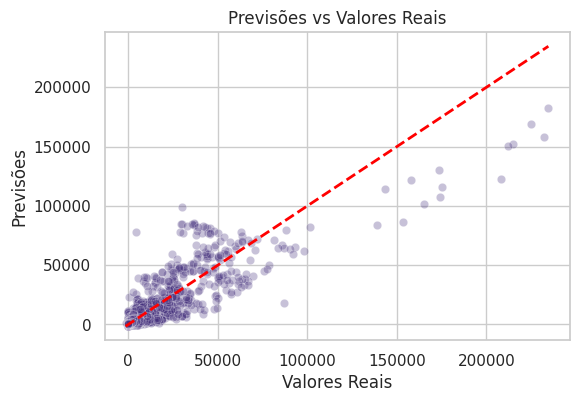

In [ ]:
# seu código# Plotar os valores reais vs previsões usando Seaborn
plt.figure(figsize=(6, 4))
ax = sns.scatterplot(x=y_test, y=y_pred, alpha=0.3)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Linha y=x

# Definir os rótulos e título do gráfico
ax.set(xlabel='Valores Reais', ylabel='Previsões', title='Previsões vs Valores Reais')

# Mostrar o gráfico
plt.show()

# **Conclusões Regressão Linear**
Melhores Parâmetros: {'fit_intercept': False}

Interpretação: O modelo de regressão linear funciona melhor sem ajustar o intercepto (fit_intercept=False). Isso sugere que a relação entre as características independentes e a variável dependente (mortes totais) já passa pela origem (0,0) ou que incluir o intercepto não melhora a precisão do modelo.
Mean Absolute Error (MAE): 573.0383054221373

Interpretação: Em média, as previsões do modelo estão desviadas em aproximadamente 573 mortes do valor real. O MAE é útil para entender a magnitude dos erros sem considerar sua direção.
Root Mean Squared Error (RMSE): 2950.7115456683937

Interpretação: O RMSE fornece uma medida da dispersão dos erros. Como é uma raiz quadrada, ele está na mesma unidade que a variável alvo (mortes totais). Um RMSE alto indica que os erros podem ser substancialmente grandes, sendo mais sensível a outliers.
R² (R-squared): 0.8017644118078371

Interpretação: Aproximadamente 80% da variância nas mortes totais pode ser explicada pelas características independentes no modelo. Isso indica um bom ajuste do modelo, embora ainda haja 20% da variação que o modelo não explica.

## **Modelo 2**
# **Modelagem do Algorítmo K-Means**


O K-Means é sensível à escala das variáveis e para usar o K-Means de maneira eficaz é necessário realizar o Escalonamento/Normalização;
A tunagem dos hiperparâmetros do K-Means pode ser feita utilizando a busca em grade (GridSearchCV) do Scikit-Learn. Contudo, como o K-Means não é um algoritmo de aprendizado supervisionado, usamos a validação cruzada personalizada;
Uma métrica comum para avaliar a qualidade dos clusters é o coeficiente de silhueta, que será utilizado para encontrarmos o melhor modelo nesse estudo.

### **Modelo 2:** Preparação dos Dados


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_score

### **Modelo 2:** Modelo


In [ ]:
# Seleção de features relevantes
features = ['daily_confirmed_cases', 'daily_deaths', 'confirmed_cases', 'deaths', 'pop_data_2019']
df_features = df[features]

# Normalização dos dados
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_features)

# Definição do GridSearchCV para tunagem de hiperparâmetros
param_grid = {'n_clusters': [i for i in range(3,10,1)],  # Número de clusters a serem testados
              'n_init': [i for i in range(10,30,10)],  # Número de vezes que o algoritmo será executado com diferentes centroides iniciais
              'max_iter': [i for i in range(300,500,100)]}  # Número máximo de iterações para uma única execução

# Instanciando o estimador do modelo
kmeans = KMeans(random_state=42)
grid_search = GridSearchCV(kmeans, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(df_scaled)

# Melhores hiperparâmetros encontrados
best_params = grid_search.best_params_
print("Melhores hiperparâmetros:", best_params)

# Aplicação do K-Means com os melhores hiperparâmetros
best_kmeans = grid_search.best_estimator_
clusters = best_kmeans.fit_predict(df_scaled)

# Avaliação do modelo
silhouette_avg = silhouette_score(df_scaled, clusters)
print(f'Coeficiente de Silhueta: {silhouette_avg}')

# Adicionando os clusters ao DataFrame original
df['cluster'] = clusters


Melhores hiperparâmetros: {'max_iter': 300, 'n_clusters': 3, 'n_init': 10}
Coeficiente de Silhueta: 0.928401555824539


### **Modelo 2:** Resultados


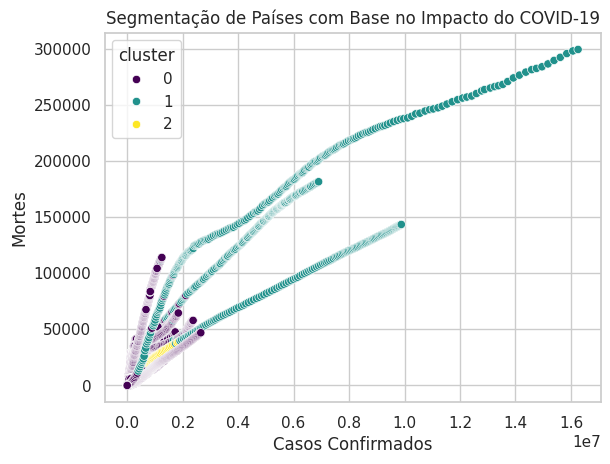

In [ ]:
# Visualização dos clusters (exemplo com duas variáveis para visualização, você pode escolher outras)
sns.scatterplot(x='confirmed_cases', y='deaths', hue='cluster', data=df, palette='viridis')
plt.title('Segmentação de Países com Base no Impacto do COVID-19')
plt.xlabel('Casos Confirmados')
plt.ylabel('Mortes')
plt.show()

# **Conclusões K-Means¶**
Os melhores hiperparâmetros encontrados, indicam as configurações que otimizaram o desempenho do algoritmo K-Means para os seus dados:

max_iter: 300 Define o número máximo de iterações para uma única execução do K-Means. Neste caso, o modelo foi configurado para realizar até 300 iterações.

n_clusters: 3 Indica o número de clusters que foram identificados como os mais adequados para agrupar os países com base no impacto do COVID-19. Aqui, o modelo identificou que 3 clusters são suficientes para representar os diferentes padrões de impacto.

n_init: 10 Refere-se ao número de vezes que o algoritmo será executado com diferentes centroides iniciais. Neste caso, o modelo foi configurado para realizar 10 inicializações diferentes.

Coeficiente de Silhueta: 0.928401555824539

O coeficiente de silhueta é uma métrica que varia de -1 a 1, onde valores mais próximos de 1 indicam clusters bem definidos e separados, enquanto valores próximos de -1 indicam sobreposição entre clusters. Um coeficiente de silhueta próximo de 1, como o obtido (~0.93), indica que os clusters formados são bem definidos e os pontos estão mais próximos do centro de seu próprio cluster do que dos centros de outros clusters. Isso sugere que o algoritmo K-Means foi capaz de identificar padrões significativos nos dados e agrupar os países de forma coerente com o impacto do COVID-19.
Com base nos melhores hiperparâmetros encontrados (n_clusters=3, max_iter=300, n_init=10), identificamos três clusters distintos que representam diferentes perfis de impacto do COVID-19 nos países estudados. Esses clusters foram determinados com um alto coeficiente de silhueta (0.93), indicando uma separação clara e consistente entre os grupos.

# **Interpretação dos clusters:**
Cluster 2 (Baixo Impacto): Composto por países que apresentaram um baixo impacto da pandemia, caracterizado por números relativamente baixos de casos confirmados e mortes relacionadas ao COVID-19. Esses países podem ter implementado medidas eficazes de contenção e mitigação da propagação do vírus.

Cluster 0 (Impacto Moderado): Engloba países com um impacto moderado da pandemia, demonstrando números intermediários de casos e mortes. Esses países podem ter experimentado desafios na resposta à pandemia, mas também adotaram medidas para controlar a propagação.

Cluster 1 (Alto Impacto): Compreende países que enfrentaram um alto impacto da pandemia, evidenciado por um grande número de casos confirmados e mortes. Esses países podem ter enfrentado dificuldades significativas na gestão da crise de saúde e podem ser alvo de preocupações adicionais em termos de recursos médicos e intervenções de saúde pública.

Esses insights são valiosos para formuladores de políticas de saúde, instituições de saúde pública e pesquisadores, pois fornecem uma compreensão detalhada das diferentes realidades enfrentadas pelos países durante a pandemia. Essa segmentação pode orientar estratégias adaptadas de resposta, alocação de recursos e tomada de decisões para enfrentar desafios futuros relacionados à COVID-19 e outras crises de saúde global.

# **Conclusão**

Neste projeto trabalhamos com dados da Covid-19, primeiramente buscamos demonstrar habilidades em aquisição de dados via Big Query (que faz parte da plataforma do Google Cloud) utilizando um pouco de SQL.

Estes dados foram escolhidos devido a relevância do tema nos dias atuais e por se tratarem de dados governamentais da European Centre for Disease Prevention and Control (ECDC).

A ECDC é uma agência da União Europeia estabelecida em 2005 com a missão de fortalecer as defesas da Europa contra doenças infecciosas. A ECDC fornece suporte científico e técnico aos estados membros da UE, ajudando a proteger a saúde pública através de uma série de atividades. A ECDC coordena e apoia a vigilância epidemiológica de doenças infecciosas na Europa, coletando e analisando dados de todos os estados membros para identificar riscos e tendências emergentes.

Trata-se de um dataset relativamente grande com mais de 60.000 linhas. Após a leitura dos dados todo o processo de entendimento e tratamento dos dados foi realizado com sucesso, e análises exploratórias foram feitas com base nas variáveis que foram disponibilizadas nos dados.

Foram feitas:

Análises de correlação e distribuição com pairplot e heatmaps da matriz de correlação;
Análises temporais com gráficos de linha demonstrando a evolução dos casos e mortes ao longo do tempo;
Análises geográficas com as variáveis dos países.
Por fim dois algoritmos de machine learning foram executados: Regressão Linear e K-Means. Estes algoritmos foram construídos utilizando técnicas de tunagem de hiperparâmetros para encontrarmos o modelo que melhor performa dentre os parâmetros escolhidos e também gráficos foram criados para melhor entendimento dos resultados.

Agradecemos pela oportunidade de realizar mais este projeto e colocar em prática o conhecimento aquirido.

Gustavo Rios, Silas Souza, Israel Soares.



# **Referências**

https://www.ecdc.europa.eu/en/data-dashboards-and-databases

https://cloud.google.com/bigquery?utm_source=google&utm_medium=cpc&utm_campaign=latam-BR-all-es-dr-BKWS-all-all-trial-e-dr-1707800-LUAC0020236&utm_content=text-ad-none-any-DEV_c-CRE_688140022982-ADGP_Hybrid+%7C+BKWS+-+EXA+%7C+Txt_Usecases-Big+Query-KWID_43700079279114436-kwd-2232079624292&utm_term=KW_google+cloud+big+query-ST_Google+Cloud+big+query&gad_source=1&gclid=Cj0KCQjwmMayBhDuARIsAM9HM8cwHAtJ5bAUTcMFr92-Ucn6fCpuYDFkNAd0Xwhudog2Ts2_PUh6VT4aAkvDEALw_wcB&gclsrc=aw.ds&hl=pt_br

---